Data Science Challenge<a href="#Data-Science-Challenge" class="anchor-link">¶</a>
=================================================================================

In \[330\]:

    # To install packages that are not installed by default, uncomment the last two lines 
    # of this cell and replace <package list> with a list of necessary packages.
    # This will ensure the notebook has all the dependencies and works everywhere.

    #import sys
    #!{sys.executable} -m pip install <package list>

In \[331\]:

    #Libraries
    import pandas as pd
    pd.set_option("display.max_columns", 101)

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

| Column                | Description                                                                                                                                               |
|:----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id`                  | The unique ID assigned to every hotel.                                                                                                                    |
| `region`              | The region in which the hotel is located..                                                                                                                |
| `latitude`            | The latitude of the hotel.                                                                                                                                |
| `longitude`           | The longitude of the hotel.                                                                                                                               |
| `accommodation_type`  | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.                                                         |
| `cost`                | The cost of booking the hotel for one night. (in \\\$\\\$)                                                                                                |
| `minimum_nights`      | The minimum number of nights stay required.                                                                                                               |
| `number_of_reviews`   | The number of reviews accumulated by the hotel.                                                                                                           |
| `reviews_per_month`   | The average number of reviews received by the hotel per month.                                                                                            |
| `owner_id`            | The unique ID assigned to every owner. An owner can own multiple hotels.                                                                                  |
| `owned_hotels`        | The number of hotels owned by the owner.                                                                                                                  |
| `yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year). |

Data Wrangling & Visualization<a href="#Data-Wrangling-&amp;-Visualization" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------

In \[332\]:

    # Dataset is already loaded below
    data = pd.read_csv("train.csv")

In \[333\]:

    data.head()

Out\[333\]:

|     | id    | region    | latitude | longitude | accommodation\_type | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels | yearly\_availability |
|-----|-------|-----------|----------|-----------|---------------------|------|-----------------|---------------------|---------------------|-----------|---------------|----------------------|
| 0   | 13232 | Manhattan | 40.71854 | -74.00439 | Entire home/apt     | 170  | 5               | 7                   | 0.56                | 929983    | 1             | 0                    |
| 1   | 246   | Brooklyn  | 40.64446 | -73.95030 | Entire home/apt     | 65   | 3               | 238                 | 2.30                | 281764    | 1             | 0                    |
| 2   | 19091 | Queens    | 40.78573 | -73.81062 | Private room        | 85   | 1               | 0                   | NaN                 | 19923341  | 1             | 1                    |
| 3   | 34305 | Manhattan | 40.73863 | -73.98002 | Private room        | 210  | 30              | 0                   | NaN                 | 200380610 | 65            | 1                    |
| 4   | 444   | Manhattan | 40.82426 | -73.94630 | Shared room         | 75   | 3               | 38                  | 0.42                | 745069    | 3             | 1                    |

In \[334\]:

    #Explore columns
    data.columns

Out\[334\]:

    Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
           'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
           'owned_hotels', 'yearly_availability'],
          dtype='object')

In \[335\]:

    #Description
    data.describe()

Out\[335\]:

|       | id           | latitude    | longitude   | cost        | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id    | owned\_hotels | yearly\_availability |
|-------|--------------|-------------|-------------|-------------|-----------------|---------------------|---------------------|--------------|---------------|----------------------|
| count | 2870.000000  | 2870.000000 | 2870.000000 | 2870.000000 | 2870.000000     | 2870.000000         | 2194.000000         | 2.870000e+03 | 2870.000000   | 2870.000000          |
| mean  | 26760.657143 | 40.731224   | -73.950158  | 195.943206  | 11.530314       | 16.315331           | 1.157502            | 7.202195e+07 | 8.411498      | 0.498606             |
| std   | 14140.930062 | 0.054942    | 0.049745    | 406.184714  | 37.972339       | 32.481722           | 1.355028            | 8.076516e+07 | 27.105522     | 0.500085             |
| min   | 0.000000     | 40.507080   | -74.242850  | 10.000000   | 1.000000        | 0.000000            | 0.010000            | 2.787000e+03 | 1.000000      | 0.000000             |
| 25%   | 15931.750000 | 40.692462   | -73.984003  | 75.000000   | 1.000000        | 1.000000            | 0.240000            | 7.388002e+06 | 1.000000      | 0.000000             |
| 50%   | 28946.500000 | 40.728250   | -73.956720  | 120.000000  | 3.000000        | 4.000000            | 0.650000            | 3.352708e+07 | 1.000000      | 0.000000             |
| 75%   | 38478.500000 | 40.762658   | -73.934202  | 200.000000  | 6.000000        | 16.000000           | 1.530000            | 1.207625e+08 | 3.000000      | 1.000000             |
| max   | 48893.000000 | 40.898730   | -73.721730  | 9999.000000 | 999.000000      | 395.000000          | 10.370000           | 2.738123e+08 | 327.000000    | 1.000000             |

In \[336\]:

    #Dropping ID_Column as it is unnecessary
    data = data.drop(['id'],axis=1) #Dropping column

In \[337\]:

    #Checking the features and rows in the data set
    data.shape

Out\[337\]:

    (2870, 11)

In \[338\]:

    #checking for NaN in the features
    data.isnull().sum()

Out\[338\]:

    region                   0
    latitude                 0
    longitude                0
    accommodation_type       0
    cost                     0
    minimum_nights           0
    number_of_reviews        0
    reviews_per_month      676
    owner_id                 0
    owned_hotels             0
    yearly_availability      0
    dtype: int64

In \[339\]:

    #Checking for duplicates
    data.duplicated().sum()

Out\[339\]:

    0

In \[340\]:

    #Filling the missing values with mean of the column
    data['reviews_per_month']=data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
    data

Out\[340\]:

|      | region    | latitude | longitude | accommodation\_type | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels | yearly\_availability |
|------|-----------|----------|-----------|---------------------|------|-----------------|---------------------|---------------------|-----------|---------------|----------------------|
| 0    | Manhattan | 40.71854 | -74.00439 | Entire home/apt     | 170  | 5               | 7                   | 0.560000            | 929983    | 1             | 0                    |
| 1    | Brooklyn  | 40.64446 | -73.95030 | Entire home/apt     | 65   | 3               | 238                 | 2.300000            | 281764    | 1             | 0                    |
| 2    | Queens    | 40.78573 | -73.81062 | Private room        | 85   | 1               | 0                   | 1.157502            | 19923341  | 1             | 1                    |
| 3    | Manhattan | 40.73863 | -73.98002 | Private room        | 210  | 30              | 0                   | 1.157502            | 200380610 | 65            | 1                    |
| 4    | Manhattan | 40.82426 | -73.94630 | Shared room         | 75   | 3               | 38                  | 0.420000            | 745069    | 3             | 1                    |
| ...  | ...       | ...      | ...       | ...                 | ...  | ...             | ...                 | ...                 | ...       | ...           | ...                  |
| 2865 | Manhattan | 40.74316 | -73.98038 | Private room        | 400  | 2               | 0                   | 1.157502            | 270096906 | 1             | 1                    |
| 2866 | Manhattan | 40.73523 | -73.99465 | Private room        | 180  | 3               | 2                   | 0.070000            | 97266110  | 1             | 1                    |
| 2867 | Manhattan | 40.76619 | -73.98987 | Entire home/apt     | 179  | 3               | 17                  | 0.670000            | 10903067  | 1             | 0                    |
| 2868 | Manhattan | 40.74637 | -73.97207 | Private room        | 200  | 30              | 0                   | 1.157502            | 2856748   | 49            | 1                    |
| 2869 | Manhattan | 40.79208 | -73.96482 | Shared room         | 1000 | 30              | 24                  | 0.330000            | 836168    | 11            | 1                    |

2870 rows × 11 columns

In \[341\]:

    #checking to convert categorical data
    data['region'].unique()

Out\[341\]:

    array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
          dtype=object)

In \[342\]:

    #checking to convert categorical data
    data['accommodation_type'].unique()

Out\[342\]:

    array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In \[343\]:

    #Converting the categorical Data
    data = pd.get_dummies(data,columns=['region','accommodation_type'])

In \[344\]:

    data

Out\[344\]:

|      | latitude | longitude | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels | yearly\_availability | region\_Bronx | region\_Brooklyn | region\_Manhattan | region\_Queens | region\_Staten Island | accommodation\_type\_Entire home/apt | accommodation\_type\_Private room | accommodation\_type\_Shared room |
|------|----------|-----------|------|-----------------|---------------------|---------------------|-----------|---------------|----------------------|---------------|------------------|-------------------|----------------|-----------------------|--------------------------------------|-----------------------------------|----------------------------------|
| 0    | 40.71854 | -74.00439 | 170  | 5               | 7                   | 0.560000            | 929983    | 1             | 0                    | 0             | 0                | 1                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 1    | 40.64446 | -73.95030 | 65   | 3               | 238                 | 2.300000            | 281764    | 1             | 0                    | 0             | 1                | 0                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 2    | 40.78573 | -73.81062 | 85   | 1               | 0                   | 1.157502            | 19923341  | 1             | 1                    | 0             | 0                | 0                 | 1              | 0                     | 0                                    | 1                                 | 0                                |
| 3    | 40.73863 | -73.98002 | 210  | 30              | 0                   | 1.157502            | 200380610 | 65            | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 4    | 40.82426 | -73.94630 | 75   | 3               | 38                  | 0.420000            | 745069    | 3             | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 0                                 | 1                                |
| ...  | ...      | ...       | ...  | ...             | ...                 | ...                 | ...       | ...           | ...                  | ...           | ...              | ...               | ...            | ...                   | ...                                  | ...                               | ...                              |
| 2865 | 40.74316 | -73.98038 | 400  | 2               | 0                   | 1.157502            | 270096906 | 1             | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 2866 | 40.73523 | -73.99465 | 180  | 3               | 2                   | 0.070000            | 97266110  | 1             | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 2867 | 40.76619 | -73.98987 | 179  | 3               | 17                  | 0.670000            | 10903067  | 1             | 0                    | 0             | 0                | 1                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 2868 | 40.74637 | -73.97207 | 200  | 30              | 0                   | 1.157502            | 2856748   | 49            | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 2869 | 40.79208 | -73.96482 | 1000 | 30              | 24                  | 0.330000            | 836168    | 11            | 1                    | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 0                                 | 1                                |

2870 rows × 17 columns

In \[345\]:

    #verifying no missing values in the dataset
    data.isnull().sum()

Out\[345\]:

    latitude                              0
    longitude                             0
    cost                                  0
    minimum_nights                        0
    number_of_reviews                     0
    reviews_per_month                     0
    owner_id                              0
    owned_hotels                          0
    yearly_availability                   0
    region_Bronx                          0
    region_Brooklyn                       0
    region_Manhattan                      0
    region_Queens                         0
    region_Staten Island                  0
    accommodation_type_Entire home/apt    0
    accommodation_type_Private room       0
    accommodation_type_Shared room        0
    dtype: int64

In \[346\]:

    #checking for outliers
    import seaborn as sns
    sns.boxplot(data=data,width=0.8)

Out\[346\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7f0aaf297810>

![](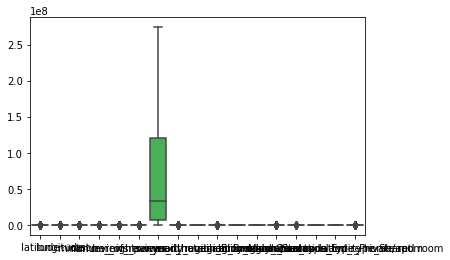%0A)

In \[350\]:

    #Correlation of features
    corr = data.corr(method='pearson') 
    plt.figure(figsize=(15,7)) 
    sns.heatmap(corr, annot=True,cmap="inferno")

Out\[350\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7f0aa7ef79d0>

![](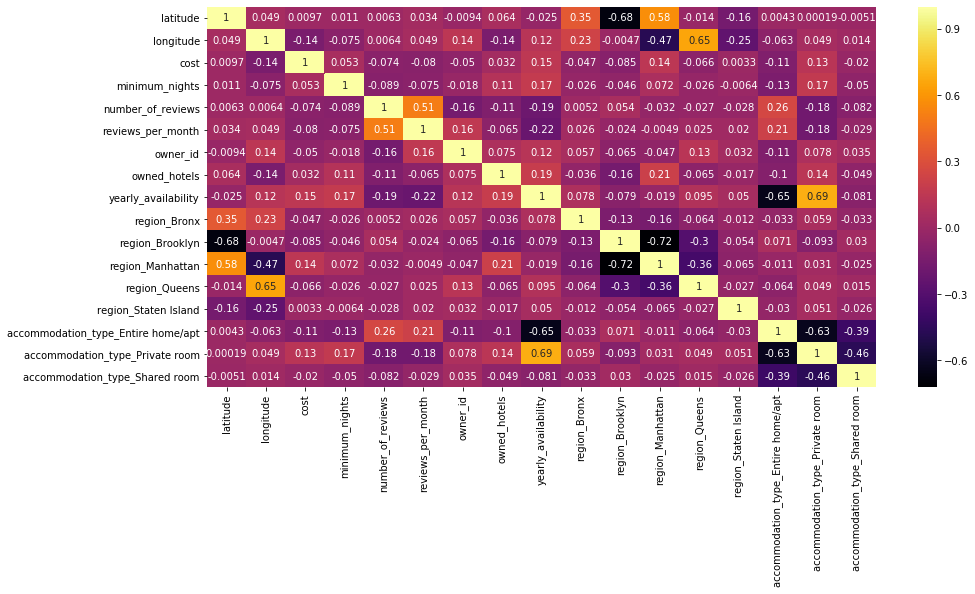%0A)

Visualization, Modeling, Machine Learning<a href="#Visualization,-Modeling,-Machine-Learning" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------

Build a model that categorizes hotels on the basis of their yearly
availability. Identify how different features influence the decision.
Please explain the findings effectively to technical and non-technical
audiences using comments and visualizations, if appropriate.

-   **Build an optimized model that effectively solves the business
    problem.**
-   **The model will be evaluated on the basis of Accuracy.**
-   **Read the test.csv file and prepare features for testing.**

In \[351\]:

    #Loading Test data
    test_data=pd.read_csv('test.csv')
    test_data.head()

Out\[351\]:

|     | id    | region    | latitude | longitude | accommodation\_type | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels |
|-----|-------|-----------|----------|-----------|---------------------|------|-----------------|---------------------|---------------------|-----------|---------------|
| 0   | 19215 | Brooklyn  | 40.70912 | -73.94513 | Shared room         | 135  | 2               | 22                  | 0.66                | 4360212   | 1             |
| 1   | 36301 | Brooklyn  | 40.57646 | -73.96641 | Entire home/apt     | 69   | 2               | 8                   | 0.90                | 181356989 | 2             |
| 2   | 40566 | Manhattan | 40.76616 | -73.98228 | Private room        | 225  | 30              | 0                   | NaN                 | 13773574  | 12            |
| 3   | 33694 | Manhattan | 40.77668 | -73.94587 | Shared room         | 125  | 30              | 9                   | 0.82                | 6788748   | 1             |
| 4   | 28873 | Manhattan | 40.80279 | -73.94450 | Entire home/apt     | 43   | 1               | 13                  | 0.72                | 105061915 | 2             |

In \[352\]:

    #Extracting the ID column to write to csv file
    id_col = test_data['id'].copy()

In \[353\]:

    test_data = test_data.drop(['id'],axis=1) #Dropping column

In \[354\]:

    test_data.isnull().sum() #Checking missing values

Out\[354\]:

    region                  0
    latitude                0
    longitude               0
    accommodation_type      0
    cost                    0
    minimum_nights          0
    number_of_reviews       0
    reviews_per_month     173
    owner_id                0
    owned_hotels            0
    dtype: int64

In \[355\]:

    test_data.duplicated().sum() #Checking duplicates

Out\[355\]:

    0

In \[356\]:

    test_data['reviews_per_month']=test_data['reviews_per_month'].fillna(test_data['reviews_per_month'].mean())
    test_data #test_data after filling missing values

Out\[356\]:

|     | region    | latitude | longitude | accommodation\_type | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels |
|-----|-----------|----------|-----------|---------------------|------|-----------------|---------------------|---------------------|-----------|---------------|
| 0   | Brooklyn  | 40.70912 | -73.94513 | Shared room         | 135  | 2               | 22                  | 0.660000            | 4360212   | 1             |
| 1   | Brooklyn  | 40.57646 | -73.96641 | Entire home/apt     | 69   | 2               | 8                   | 0.900000            | 181356989 | 2             |
| 2   | Manhattan | 40.76616 | -73.98228 | Private room        | 225  | 30              | 0                   | 1.200385            | 13773574  | 12            |
| 3   | Manhattan | 40.77668 | -73.94587 | Shared room         | 125  | 30              | 9                   | 0.820000            | 6788748   | 1             |
| 4   | Manhattan | 40.80279 | -73.94450 | Entire home/apt     | 43   | 1               | 13                  | 0.720000            | 105061915 | 2             |
| ... | ...       | ...      | ...       | ...                 | ...  | ...             | ...                 | ...                 | ...       | ...           |
| 713 | Bronx     | 40.84590 | -73.91558 | Entire home/apt     | 77   | 2               | 36                  | 1.810000            | 153826581 | 1             |
| 714 | Brooklyn  | 40.71026 | -73.94744 | Entire home/apt     | 145  | 3               | 43                  | 1.360000            | 4198285   | 1             |
| 715 | Manhattan | 40.71390 | -73.99120 | Entire home/apt     | 90   | 2               | 60                  | 4.350000            | 151507961 | 1             |
| 716 | Manhattan | 40.74399 | -73.97204 | Private room        | 200  | 30              | 0                   | 1.200385            | 221200420 | 23            |
| 717 | Manhattan | 40.70749 | -74.01413 | Private room        | 169  | 30              | 2                   | 0.060000            | 30283594  | 121           |

718 rows × 10 columns

In \[357\]:

    test_data['region'].unique()

Out\[357\]:

    array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
          dtype=object)

In \[358\]:

    test_data = pd.get_dummies(test_data,columns=['region','accommodation_type'])

In \[360\]:

    test_data.isnull().sum() #verifying the dataset for missing values after pre-processing

Out\[360\]:

    latitude                              0
    longitude                             0
    cost                                  0
    minimum_nights                        0
    number_of_reviews                     0
    reviews_per_month                     0
    owner_id                              0
    owned_hotels                          0
    region_Bronx                          0
    region_Brooklyn                       0
    region_Manhattan                      0
    region_Queens                         0
    region_Staten Island                  0
    accommodation_type_Entire home/apt    0
    accommodation_type_Private room       0
    accommodation_type_Shared room        0
    dtype: int64

In \[361\]:

    test_data #final test dataset after pre-processing

Out\[361\]:

|     | latitude | longitude | cost | minimum\_nights | number\_of\_reviews | reviews\_per\_month | owner\_id | owned\_hotels | region\_Bronx | region\_Brooklyn | region\_Manhattan | region\_Queens | region\_Staten Island | accommodation\_type\_Entire home/apt | accommodation\_type\_Private room | accommodation\_type\_Shared room |
|-----|----------|-----------|------|-----------------|---------------------|---------------------|-----------|---------------|---------------|------------------|-------------------|----------------|-----------------------|--------------------------------------|-----------------------------------|----------------------------------|
| 0   | 40.70912 | -73.94513 | 135  | 2               | 22                  | 0.660000            | 4360212   | 1             | 0             | 1                | 0                 | 0              | 0                     | 0                                    | 0                                 | 1                                |
| 1   | 40.57646 | -73.96641 | 69   | 2               | 8                   | 0.900000            | 181356989 | 2             | 0             | 1                | 0                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 2   | 40.76616 | -73.98228 | 225  | 30              | 0                   | 1.200385            | 13773574  | 12            | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 3   | 40.77668 | -73.94587 | 125  | 30              | 9                   | 0.820000            | 6788748   | 1             | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 0                                 | 1                                |
| 4   | 40.80279 | -73.94450 | 43   | 1               | 13                  | 0.720000            | 105061915 | 2             | 0             | 0                | 1                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| ... | ...      | ...       | ...  | ...             | ...                 | ...                 | ...       | ...           | ...           | ...              | ...               | ...            | ...                   | ...                                  | ...                               | ...                              |
| 713 | 40.84590 | -73.91558 | 77   | 2               | 36                  | 1.810000            | 153826581 | 1             | 1             | 0                | 0                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 714 | 40.71026 | -73.94744 | 145  | 3               | 43                  | 1.360000            | 4198285   | 1             | 0             | 1                | 0                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 715 | 40.71390 | -73.99120 | 90   | 2               | 60                  | 4.350000            | 151507961 | 1             | 0             | 0                | 1                 | 0              | 0                     | 1                                    | 0                                 | 0                                |
| 716 | 40.74399 | -73.97204 | 200  | 30              | 0                   | 1.200385            | 221200420 | 23            | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |
| 717 | 40.70749 | -74.01413 | 169  | 30              | 2                   | 0.060000            | 30283594  | 121           | 0             | 0                | 1                 | 0              | 0                     | 0                                    | 1                                 | 0                                |

718 rows × 16 columns

In \[362\]:

    from collections import Counter
    from matplotlib import pyplot
    from numpy import where
    # summarize class distribution
    counter = Counter(data['yearly_availability'])
    print(counter) #checking whetehr the train data is balanced

    Counter({0: 1439, 1: 1431})

In \[363\]:

    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

In \[364\]:

    y_Data = data['yearly_availability'].copy() #copying target values into y_Data

In \[365\]:

    data = data.drop(columns=['yearly_availability']) # Dropping target from train features

In \[366\]:

    classifier = RandomForestClassifier(random_state=6) #Apply Random Forest

In \[367\]:

    param_grid = {'n_estimators': [100,200,500], 
                  'criterion' :['gini','entropy']
                  }

In \[368\]:

    classifier_Grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
    classifier_Grid.fit(data, y_Data) #Perform Grid Search and fit

Out\[368\]:

    GridSearchCV(cv=5, error_score='raise-deprecating',
                 estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                                  criterion='gini', max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn', n_jobs=None,
                                                  oob_score=False, random_state=6,
                                                  verbose=0, warm_start=False),
                 iid='warn', n_jobs=None,
                 param_grid={'criterion': ['gini', 'entropy'],
                             'n_estimators': [100, 200, 500]},
                 pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
                 scoring=None, verbose=0)

In \[369\]:

    classifier_Grid.best_params_ # Find criterion and n_estimators

Out\[369\]:

    {'criterion': 'entropy', 'n_estimators': 100}

In \[370\]:

    from sklearn.ensemble import RandomForestClassifier
    RandomForestClassifier = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=6)
    RandomForestClassifier.fit(data,y_Data)
    Random_Forest_prediction=RandomForestClassifier.predict(test_data) #predict target values for the test data

In \[371\]:

    Random_Forest_prediction

Out\[371\]:

    array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
           0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
           0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
           1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
           1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
           0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
           1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
           1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
           1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
           1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
           0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
           0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
           1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
           1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
           1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
           1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
           1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
           1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
           1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
           1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
           0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
           1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
           1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
           1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
           1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
           1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
           1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
           1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
           0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
           0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
           0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
           1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In \[372\]:

    feature_importance = pd.Series(RandomForestClassifier.feature_importances_, index=data.columns) #extracting feature importance

In \[373\]:

    feature_importance

Out\[373\]:

    latitude                              0.052621
    longitude                             0.056493
    cost                                  0.050997
    minimum_nights                        0.049910
    number_of_reviews                     0.073206
    reviews_per_month                     0.061990
    owner_id                              0.046116
    owned_hotels                          0.147095
    region_Bronx                          0.004685
    region_Brooklyn                       0.004413
    region_Manhattan                      0.005283
    region_Queens                         0.004604
    region_Staten Island                  0.000046
    accommodation_type_Entire home/apt    0.176790
    accommodation_type_Private room       0.213351
    accommodation_type_Shared room        0.052399
    dtype: float64

**Highlight the most important features of the model for management.**

> #### Task:<a href="#Task:" class="anchor-link">¶</a>
>
> -   **Visualize the top 20 features and their feature importance.**

In \[376\]:

    import matplotlib.pyplot as plt
    import numpy
    indices=numpy.argsort(feature_importance)
    features=data.columns
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(feature_importance)),feature_importance[indices],color='b')
    plt.yticks(range(len(indices)),features[indices]) #Below shows the feature importance in sorted manner from top

Out\[376\]:

    ([<matplotlib.axis.YTick at 0x7f0ab2d22410>,
      <matplotlib.axis.YTick at 0x7f0ab608b890>,
      <matplotlib.axis.YTick at 0x7f0ab2d18bd0>,
      <matplotlib.axis.YTick at 0x7f0ab2a12bd0>,
      <matplotlib.axis.YTick at 0x7f0ab29fd210>,
      <matplotlib.axis.YTick at 0x7f0ab29fd750>,
      <matplotlib.axis.YTick at 0x7f0ab29fdd10>,
      <matplotlib.axis.YTick at 0x7f0ab2927350>,
      <matplotlib.axis.YTick at 0x7f0ab2927990>,
      <matplotlib.axis.YTick at 0x7f0ab2927f10>,
      <matplotlib.axis.YTick at 0x7f0ab2908610>,
      <matplotlib.axis.YTick at 0x7f0ab2908c50>,
      <matplotlib.axis.YTick at 0x7f0ab2908ad0>,
      <matplotlib.axis.YTick at 0x7f0ab29fd810>,
      <matplotlib.axis.YTick at 0x7f0ab2904610>,
      <matplotlib.axis.YTick at 0x7f0ab29041d0>],
     <a list of 16 Text yticklabel objects>)

![](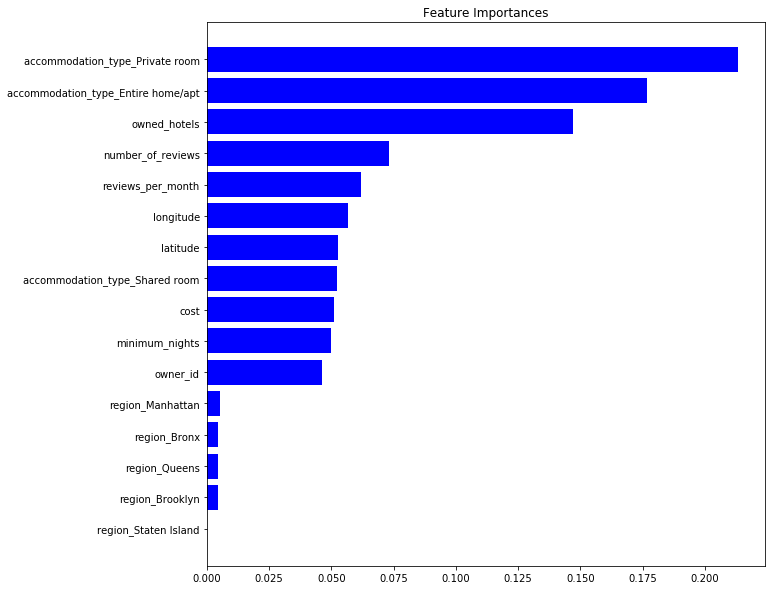%0A)

> #### Task:<a href="#Task:" class="anchor-link">¶</a>
>
> -   **Submit the predictions on the test dataset using your optimized
>     model**  
>     For each record in the test set (`test.csv`), predict the value of
>     the `yearly_availability` variable. Submit a CSV file with a
>     header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:

-   **id**
-   **yearly\_availability**

In \[377\]:

    arr = id_col.to_numpy()
    Random_Forest_prediction_ = numpy.array([Random_Forest_prediction])
    arr_final = numpy.stack((arr,Random_Forest_prediction),axis=-1) #staking columns

In \[378\]:

    submission_df = pd.DataFrame(arr_final,columns=['id','yearly_availability']) #Converting array to DataFrame

In \[379\]:

    #Submission
    submission_df.to_csv('submissions.csv',index=False)

------------------------------------------------------------------------